# Function optimization

In [3]:
%matplotlib inline

import numpy as np 
from matplotlib import pylab as plt
from seqmml import SeqUD, SMACOPT, GPEIOPT, TPEOPT

def plot_trajectory(xlim, ylim, func, clf, title):
    grid_num = 25
    xlist = np.linspace(xlim[0], xlim[1], grid_num)
    ylist = np.linspace(ylim[0], ylim[1], grid_num)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((grid_num,grid_num))
    for i, x1 in enumerate(xlist):
        for j, x2 in enumerate(ylist):
            Z[j,i] = func({"x1": x1, "x2": x2})

    cp = plt.contourf(X, Y, Z)
    plt.scatter(clf.logs.loc[:,['x1']], 
                clf.logs.loc[:,['x2']], color = "red")
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    plt.colorbar(cp)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    
rand_seed = 0
max_runs = 100

### 1  Cliff-Shaped function

 $$
f_{1}\left(x_{1}, x_{2} \right) = \left(x_{1}, x_{2} \right) = \exp \left\{-\frac{1}{2} \frac {x_{1}^{2}}{100} \right\} - \frac{1}{2} \left(x_{2} + 0.03 x_{1}^{2} - 3 \right)^{2}, \\
 x_{1} \in [-20,20 ] , x_{2} \in [-10,5].
$$

In [2]:
def cliff(parameters):
    x1 = parameters['x1']
    x2 = parameters['x2']
    term1 = -0.5*x1**2/100
    term2 = -0.5*(x2+0.03*x1**2-3)**2
    y = np.exp(term1 + term2)
    return  y

ParaSpace = {'x1': {'Type': 'continuous', 'Range': [-20,20], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [-10,5], 'Wrapper': lambda x: x}}

In [3]:
sequd_clf = SeqUD(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
sequd_clf.fmin(cliff)

tpe_clf = TPEOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
tpe_clf.fmin(cliff)

smac_clf = SMACOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
smac_clf.fmin(cliff)

gpei_clf = GPEIOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
gpei_clf.fmin(cliff)

Stage 1 completed (20/100) with best score: 0.87563.
Stage 2 completed (34/100) with best score: 0.99222.
Stage 3 completed (48/100) with best score: 0.99222.
Stage 4 completed (63/100) with best score: 0.99222.
Stage 5 completed (78/100) with best score: 0.99981.
Stage 6 completed (94/100) with best score: 0.99981.
Maximum number of runs reached, stop!
Search completed in 4.87 seconds.
The best score is: 0.99981.
The best configurations are:
x1                  : 0.125
x2                  : 2.98438


Search completed in 2.79 seconds.
The best score is: 0.97776.
The best configurations are:
x1                  : 1.52357
x2                  : 2.78281



Search completed in 54.79 seconds.
The best score is: 0.99792.
The best configurations are:
x1                  : 0.51643
x2                  : 3.03082



Search completed in 520.24 seconds.
The best score is: 0.99998.
The best configurations are:
x1                  : 0.04845
x2                  : 3.00492



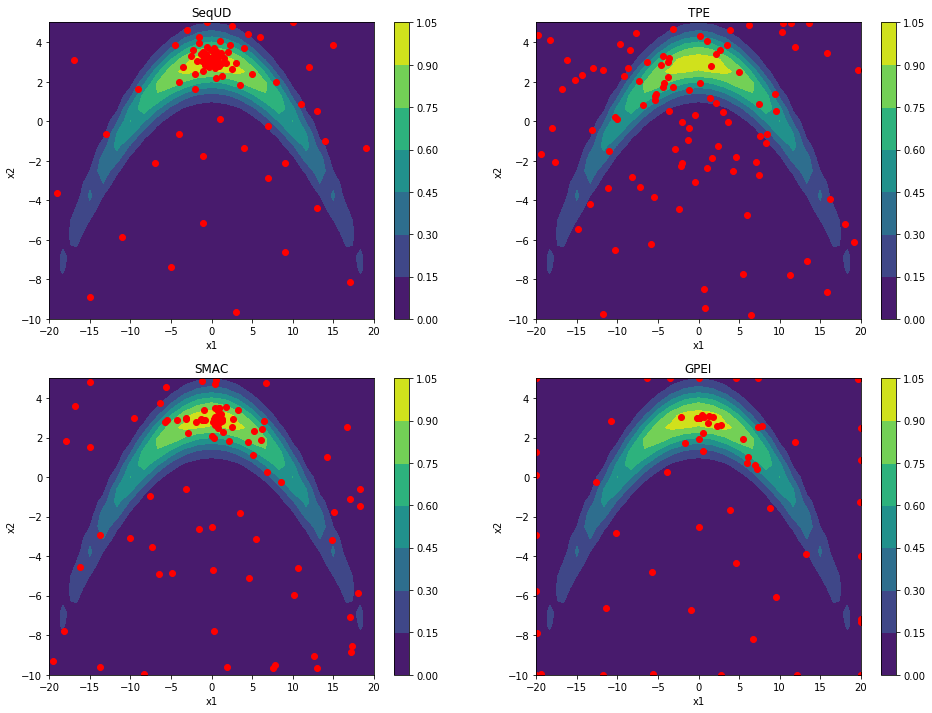

In [4]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plot_trajectory([-20,20], [-10,5], cliff, sequd_clf, "SeqUD")

plt.subplot(2,2,2)
plot_trajectory([-20,20], [-10,5], cliff, tpe_clf, "TPE")

plt.subplot(2,2,3)
plot_trajectory([-20,20], [-10,5], cliff, smac_clf, "SMAC")

plt.subplot(2,2,4)
plot_trajectory([-20,20], [-10,5], cliff, gpei_clf, "GPEI")

### 2. Octopus-Shaped function

$$
f_{2}(x_{1}, x_{2})  = 2cos(10x)\sin(10y)+\sin(10xy), \quad x_{1}, x_{2} \in [0, 1].
$$

In [4]:
def octopus(parameters):
    x1 = parameters['x1']
    x2 = parameters['x2']
    y = 2*np.cos(10*x1)*np.sin(10*x2)+np.sin(10*x1*x2)
    return  y

Level_Number = 20
ParaSpace = {'x1': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}}

In [5]:
sequd_clf = SeqUD(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
sequd_clf.fmin(octopus)

tpe_clf = TPEOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
tpe_clf.fmin(octopus)

smac_clf = SMACOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
smac_clf.fmin(octopus)

gpei_clf = GPEIOPT(ParaSpace, max_runs = max_runs, rand_seed = rand_seed, verbose = True)
gpei_clf.fmin(octopus)

Stage 1 completed (20/100) with best score: 2.69862.


NameError: name 'random' is not defined

In [53]:
import random
np.random.seed(1)
random.sample([2,3,4],1)

[3]

NameError: name 'tpe_clf' is not defined

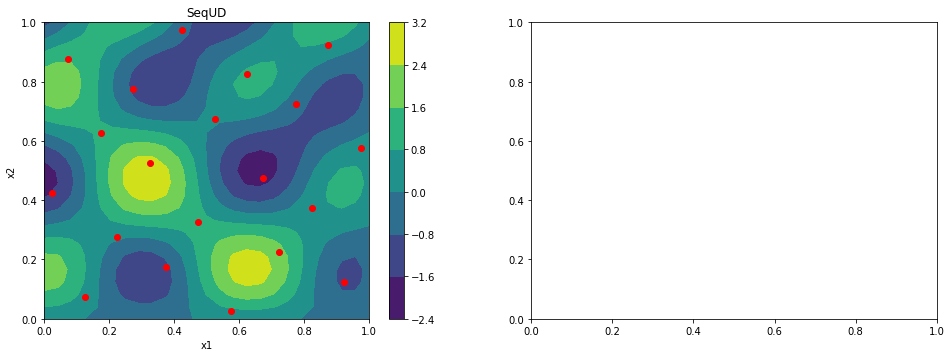

In [6]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plot_trajectory([0,1], [0,1], octopus, sequd_clf, "SeqUD")

plt.subplot(2,2,2)
plot_trajectory([0,1], [0,1], octopus, tpe_clf, "TPE")

plt.subplot(2,2,3)
plot_trajectory([0,1], [0,1], octopus, smac_clf, "SMAC")

plt.subplot(2,2,4)
plot_trajectory([0,1], [0,1], octopus, gpei_clf, "GPEI")